In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


**In The Name Of ALLÃH The Most Gracious The Most Merciful**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def load_data(path,**kwargs):
    try:
        df=pd.read_csv(path)
        print(f'load successfuly from {path}')
        return df
    except exception as e:
        print(f'Error {e}')
        return None

In [4]:
train=load_data('/kaggle/input/playground-series-s5e1/train.csv')
test=load_data('/kaggle/input/playground-series-s5e1/test.csv')

load successfuly from /kaggle/input/playground-series-s5e1/train.csv
load successfuly from /kaggle/input/playground-series-s5e1/test.csv


In [5]:
def summary(df):
    '''
    i will briefly summarise the most important infos
    '''
    print(f'DataFrame Shape Is \n{df.shape}\n\n')
    summ=pd.DataFrame(df.dtypes,columns=['Data Types'])
    summ['Missing#']=df.isna().sum()
    summ['Mussing%']=(df.isna().sum())/df.shape[0]
    summ['Duplicate']=df.duplicated().sum()
    summ['Unique']=df.nunique().values
    desc=df.describe(include='all').transpose()
    summ['Min']=desc['min'].values
    summ['Max']=desc['max'].values
    summ['standatd dev']=desc['std'].values
    summ['Mean']=desc['mean'].values
    summ['First Value']=df.loc[0].values
    display(summ)
    print('DataFrame First Rows ..')
    display(df.head(10))

In [6]:
summary(train)

DataFrame Shape Is 
(230130, 6)




,Data Types,Missing#,Mussing%,Duplicate,Unique,Min,Max,standatd dev,Mean,First Value
id,int64,0,0.000000,0,230130,0.0,230129.0,66432.953062,115064.5,0
date,object,0,0.000000,0,2557,NaN,NaN,NaN,NaN,2010-01-01
country,object,0,0.000000,0,6,NaN,NaN,NaN,NaN,Canada
store,object,0,0.000000,0,3,NaN,NaN,NaN,NaN,Discount Stickers
product,object,0,0.000000,0,5,NaN,NaN,NaN,NaN,Holographic Goose
num_sold,float64,8871,0.038548,0,4037,5.0,5939.0,690.165445,752.527382,NaN


DataFrame First Rows ..


,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
6,6,2010-01-01,Canada,Stickers for Less,Kaggle,1837.0
7,7,2010-01-01,Canada,Stickers for Less,Kaggle Tiers,1659.0
8,8,2010-01-01,Canada,Stickers for Less,Kerneler,807.0
9,9,2010-01-01,Canada,Stickers for Less,Kerneler Dark Mode,940.0


**Insights On DataSet**
* There Is No Numerical Features "Excluding The Index And Target Features"
* The Date Column Is On Object Type, We Will Convert It And Deal With That Later On
* There is no null or missing values "excluded what is missed on the target feature (we will save the time and effort of filling the nan and testing the results for the most appreciate fill value)
* the missing percentage in target is save to drop it without being afraid from loosing alot of data(although we will anyway as it's the target)
* no duplicated rows on the entire dataset (and as we will see nor in the test set also
* we wouldn't need scaling any thing
* the standard deviation is relatively large for target value

In [7]:
summary(test)

DataFrame Shape Is 
(98550, 5)




,Data Types,Missing#,Mussing%,Duplicate,Unique,Min,Max,standatd dev,Mean,First Value
id,int64,0,0.0,0,98550,230130.0,328679.0,28449.078852,279404.5,230130
date,object,0,0.0,0,1095,NaN,NaN,NaN,NaN,2017-01-01
country,object,0,0.0,0,6,NaN,NaN,NaN,NaN,Canada
store,object,0,0.0,0,3,NaN,NaN,NaN,NaN,Discount Stickers
product,object,0,0.0,0,5,NaN,NaN,NaN,NaN,Holographic Goose


DataFrame First Rows ..


,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
5,230135,2017-01-01,Canada,Stickers for Less,Holographic Goose
6,230136,2017-01-01,Canada,Stickers for Less,Kaggle
7,230137,2017-01-01,Canada,Stickers for Less,Kaggle Tiers
8,230138,2017-01-01,Canada,Stickers for Less,Kerneler
9,230139,2017-01-01,Canada,Stickers for Less,Kerneler Dark Mode


In [8]:
def sep_cols(df,idx,target=None):
    num_cols=[col for col in df.select_dtypes(include=np.number).drop(idx,axis=1).columns]
    cat_cols=[col for col in df.select_dtypes(include=['object']).columns]
    return num_cols,cat_cols

of course we won't need num columns so we will use dummy variable to bass it"i just included it as it's benefiting habit"abs

In [9]:
train['date']=pd.to_datetime(train['date'])
test['date']=pd.to_datetime(test['date'])

i should "after conversation" consider the date column in my model but I won't here because of the goal of that project is just to test the linearity of the relationships here 

In [10]:
# Summary statistics for categorical variables
train.describe(include='object')

,country,store,product
count,230130,230130,230130
unique,6,3,5
top,Canada,Discount Stickers,Holographic Goose
freq,38355,76710,46026


In [11]:
_,cats=sep_cols(train,'id')

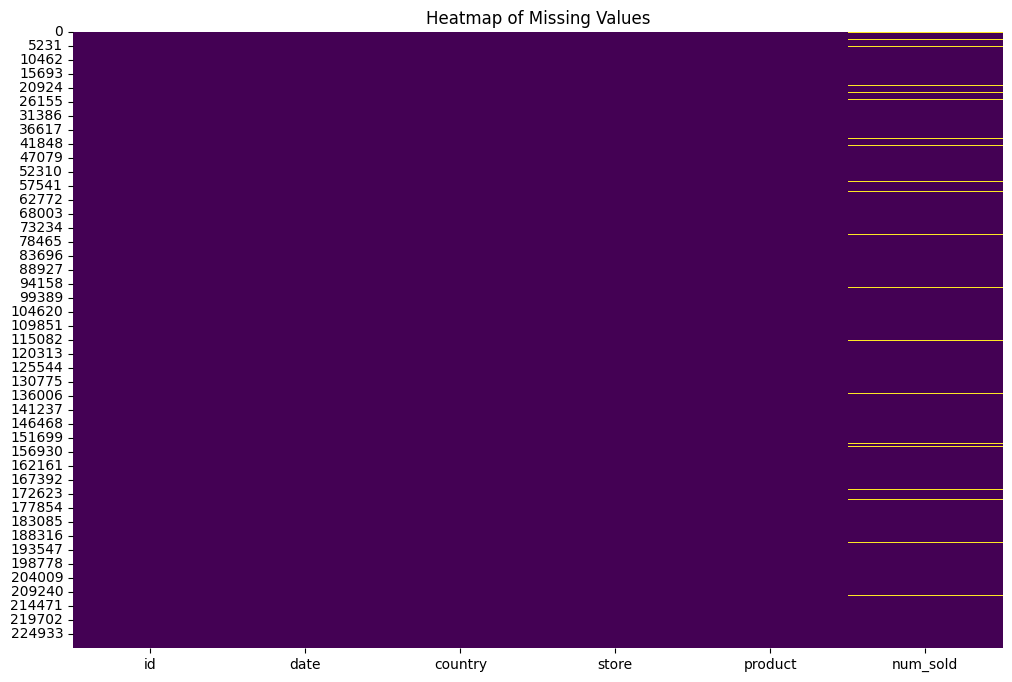

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

as we said we will now drop nulls

In [13]:
train.dropna(inplace=True)

In [14]:
for col in train[cats]:
    print(f'Value Counts Of {col}')
    display(train[col].value_counts())

Value Counts Of country


country
Finland      38355
Italy        38355
Norway       38355
Singapore    38355
Canada       34109
Kenya        33730
Name: count, dtype: int64

Value Counts Of store


store
Premium Sticker Mart    75684
Stickers for Less       74044
Discount Stickers       71531
Name: count, dtype: int64

Value Counts Of product


product
Kaggle                46026
Kaggle Tiers          46026
Kerneler Dark Mode    46025
Kerneler              45962
Holographic Goose     37220
Name: count, dtype: int64

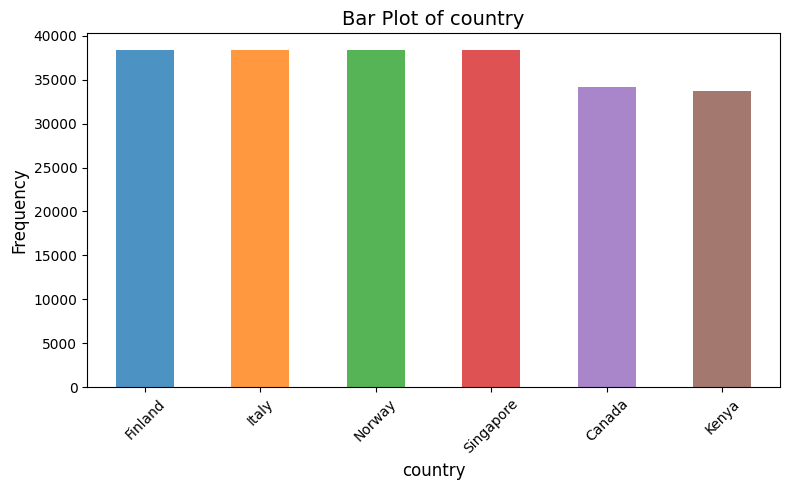

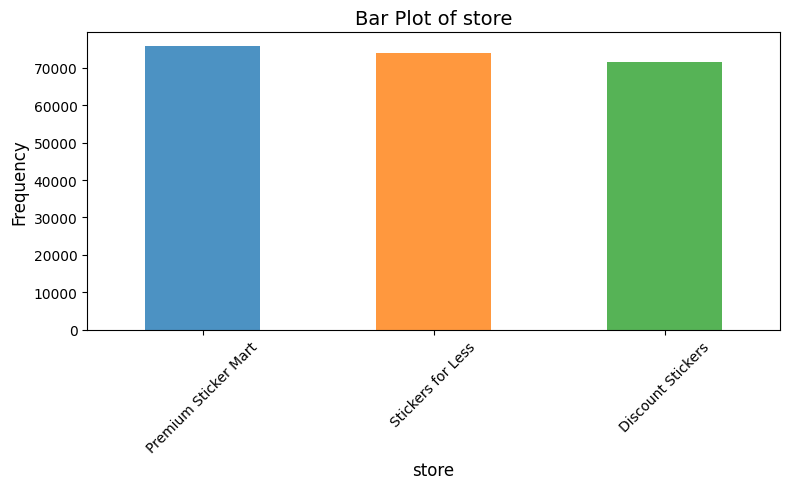

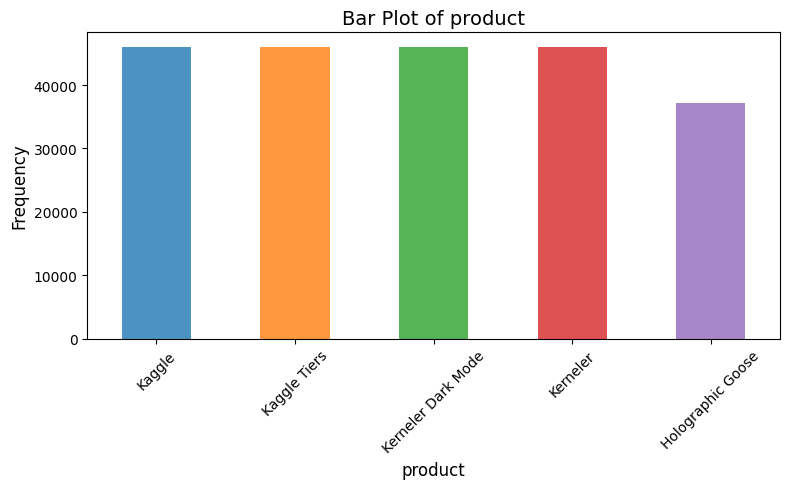

In [15]:
for cat in cats:

    plt.figure(figsize=(8, 5))

    train[cat].value_counts().plot(kind='bar', color=plt.cm.tab10.colors, alpha=0.8)

    plt.title(f'Bar Plot of {cat}', fontsize=14)

    plt.xlabel(cat, fontsize=12)

    plt.ylabel('Frequency', fontsize=12)

    plt.xticks(rotation=45, fontsize=10)

    plt.tight_layout()

    plt.show()

we now will test the relationship between the variation of every feature with the target 

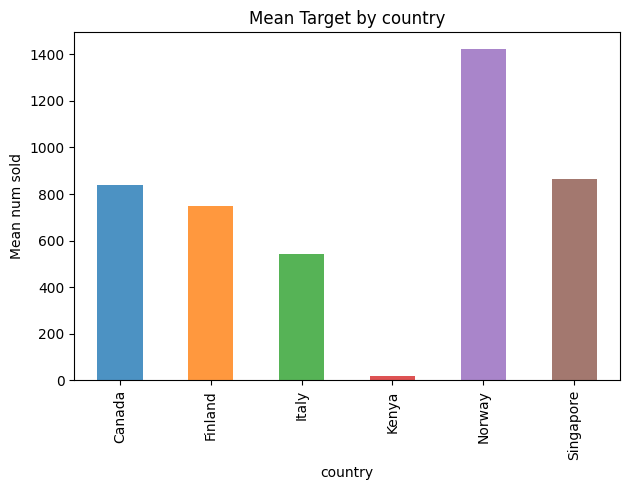

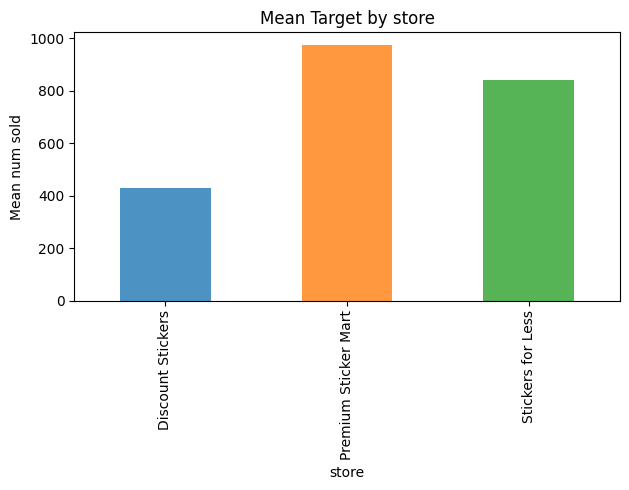

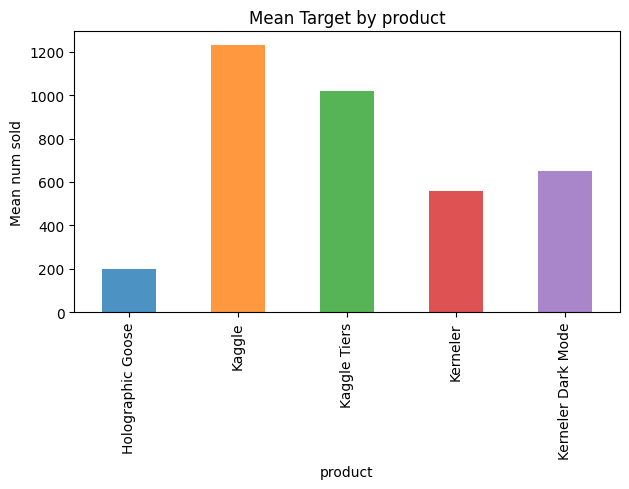

In [16]:
for cat in cats:
    plt.figure(figsize=(12, 5))

    # Bar plot (mean)
    plt.subplot(1, 2, 2)
    train.groupby(cat)['num_sold'].mean().plot(kind='bar', color=plt.cm.tab10.colors, alpha=0.8)
    plt.title(f'Mean Target by {cat}')
    plt.xlabel(cat)
    plt.ylabel('Mean num sold')

    plt.tight_layout()
    plt.show()

having sense of the values of each feature graphically

In [17]:
import plotly.express as px
import plotly.graph_objects as go

def plot_all_interactive_pie_charts(df, categorical_features):
    """
    Plot all interactive pie charts for the distribution of categorical columns in a grid layout using Plotly.
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        categorical_features (list): List of categorical column names.
    """
    # Calculate the grid size: 2 columns per row
    n_cols = 2
    n_rows = -(-len(categorical_features) // n_cols)  # Ceiling division for rows
    
    fig = make_subplots(
        rows=n_rows,
        cols=n_cols,
        subplot_titles=categorical_features,
        specs=[[{"type": "domain"} for _ in range(n_cols)] for _ in range(n_rows)],
    )

    for i, column in enumerate(categorical_features):
        counts = df[column].value_counts()
        labels = counts.index
        sizes = counts.values

        # Add pie chart to the corresponding subplot
        fig.add_trace(
            go.Pie(
                labels=labels,
                values=sizes,
                hole=0.4,
                textinfo="percent+label",
                marker=dict(
                    line=dict(color="black", width=2),
                    colors=px.colors.qualitative.Set3[:len(labels)],
                ),
                pull=[0.1 if i == sizes.argmax() else 0 for i in range(len(sizes))],
            ),
            row=(i // n_cols) + 1,
            col=(i % n_cols) + 1,
        )

    # Update layout for better visualization
    fig.update_layout(
        title="Distributions of Categorical Columns",
        height=400 * n_rows,  # Adjust height dynamically based on the number of rows
        width=800,
        showlegend=False,
    )

    fig.show()

# Example usage
from plotly.subplots import make_subplots

plot_all_interactive_pie_charts(train, cats)


In [18]:
plot_all_interactive_pie_charts(test,cats)

preparing the libraries for build our model

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf


In [20]:
# Define the OLS formula.
ols_formula='num_sold~C(country)+C(product)+C(store)'

#Create an OLS model.
OLS = ols(formula = ols_formula, data = train)

# Fit the model.

model = OLS.fit()

# Save the results summary.

model_results = model.summary()

# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_sold   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 7.552e+04
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:15:03   Log-Likelihood:            -1.5878e+06
No. Observations:              221259   AIC:                         3.176e+06
Df Residuals:                  221247   BIC:                         3.176e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -244.6529      2.607    -93.843      0.000    -249.763    -239.543
C(country)[T.Finland]                6.9763      2.363      2.952      0.003       2.344      11.609
C(country)[T.Italy]               -199.0256      2.363    -84.208      0.000    -203.658    -194.393
C(country)[T.Kenya]               -825.4645      2.431   -339.610      0.000    -830.228    -820.701
C(country)[T.Norway]               681.2935      2.363    288.257      0.000     676.661     685.926
C(country)[T.Singapore]            121.7854      2.363     51.528      0.000     117.153     126.418
C(product)[T.Kaggle]              1161.8341      2.221    523.110      0.000    1157.481    1166.187
C(product)[T.Kaggle Tiers]         947.7937      2.221    426.739      0.000     943.441     952.147
C(product)[T.Kerneler]             484.7923      2.221    218.229      0.000     480.438     489.146
C(product)[T.Kerneler Dark Mode]   580.4668      2.221    261.351      0.000     576.114     584.820
C(store)[T.Premium Sticker Mart]   604.0816      1.654    365.200      0.000     600.840     607.324
C(store)[T.Stickers for Less]      448.7457      1.661    270.204      0.000     445.491     452.001
==============================================================================
Omnibus:                    63968.651   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320150.466
Skew:                           1.316   Prob(JB):                         0.00
Kurtosis:                       8.272   Cond. No.                         8.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model assumption**
* Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.



* Normality

Testing a model for normality means checking whether the residuals (errors) of the model follow a normal distribution. In regression models, one of the key assumptions is that the residuals are normally distributed, especially for making accurate predictions and conducting statistical hypothesis tests (like 
𝑡
t-tests and 
𝐹
F-tests).

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



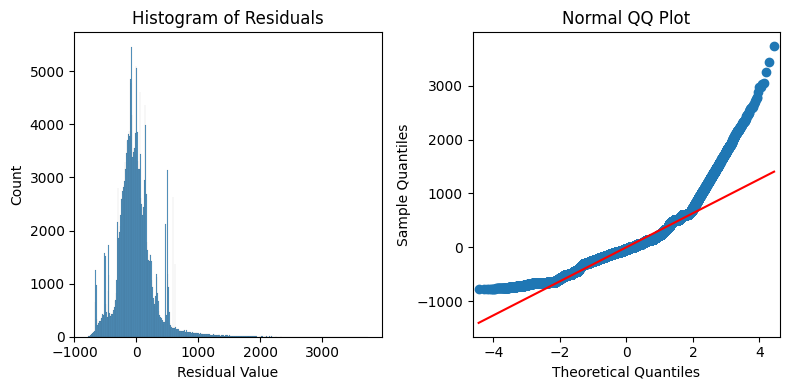

In [21]:
#Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
plt.show()

* **Constant Variance**

Testing a model for constant variance, also known as homoscedasticity, means checking whether the residuals (errors) of the model have the same spread (variance) across all levels of the independent variables. This is a key assumption in regression analysis.

If the variance of the residuals changes (e.g., increases or decreases) across the range of predicted values or independent variables, the model suffers from heteroscedasticity.

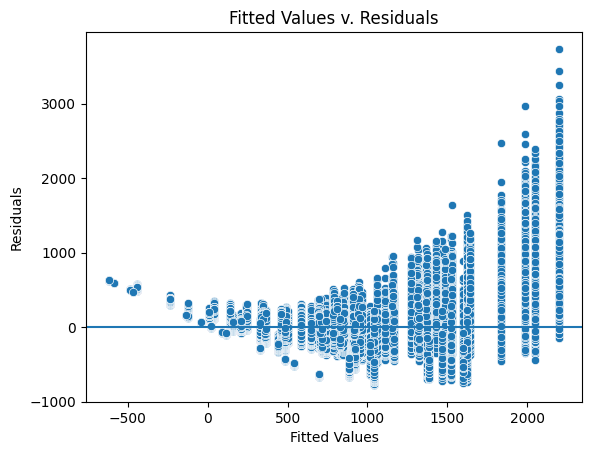

In [22]:
#Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

fig.axhline(0)

# Show the plot.
plt.show()

by now our results telling us that we are safe to build our model so let's begin 

In [23]:
model = smf.ols(formula="num_sold ~ country + product + store", data=train).fit()


In [24]:
#Predict on test dataset
test['num_sold'] = model.predict(test)


In [25]:
prd=pd.DataFrame({
    'id':test['id'],
    'num_sold':test['num_sold']}
)

In [26]:
prd.to_csv('submission.csv', index=False)

**all the praises and thanks be to ALLÃH the Lord Of the Ãlamein**